<a href="https://colab.research.google.com/github/joaovicbrss/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_da_Ilha_de_Malta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Malta*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao arquipélogo de Malta, e ver quais insights podem ser extraídos a partir de dados brutos.**

#### **Sobre Malta**
A República de Malta é um formada por ilhas que abrange um território terrestre de 316 Km². Localizada ao sul da ilha de Sicília (Itália) e o nordeste da Tunísia (África). Por ser um país histórico e com paisagens paradisíacas recebe muitos turistas, o que nos leva a analisar os números do Airbnb nessa região.

Falando um pouco do panorama turístico de Malta, o país está pagando para turistas que visitarem a ilha. Devido a pandemia, o número de turistas caiu 80%, segundo Reuters. Com um investimento de mais de 4 milhões de dólares, existe a expectativa de atrair mais de 35 mil visitantes para o arquipélago.

Malta também foi muito elogiada pela Organização Mundial da Saúde (OMS) pelas ações rápidas para conter o vírus no país. Atualmente para viajar para as ilhas é necessário ter tomado vacina contra a Convid-19. Malta é o primeiro país União Europeia (UE) a exigir a prova de vacina aos viajantes. A medida é para proteger a população da doença, já que mais 79% dela foi vacinada, alcançando assim a chamada imunidade de rebanho.



<center><img alt="Analisando Airbnb" width="100%" src="https://turistaprofissional.com/wp-content/uploads/2014/11/dicas-de-malta.jpg"></center>



## Obtenção dos Dados
Os dados dessa análise foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Tem por objetivo prover dados sem custo que quantifica o impacto do aluguel de curto prazo na habitação e comunidade residenciais.

A análise exploratoria foi baseada do arquivo de 29 de abril de 2021:
* listings.csv - _Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)._

O DataFrame(DF) é os dados estruturados em forma de tabela, com linha (entradas ou registros) e colunas (variáveis). Através da biblioteca Panda, que é amplamente utilizada na área de trabalho com dados, conseguimos transforma um simples arquivo .csv em DataFrame.  Utilizando esse formato, facilita a vizualização e o entendimento da base de dados.

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/malta/2021-04-29/visualisations/listings.csv')

## Análise dos Dados
Esta etapa tem como explorar e entender como os dados na base de dados estão dispostos. Sabendo o como os dados estão estruturados, podemos começar a extrair informações para tentar tira-las algum conhecimento.





**Dicionário das variáveis**

* `id` - *Número de identificação do imóvel*
* `name` - *Nome do imóvel*
* `host_id` - *Número de identificação do proprietário do imóvel*
* `host_name` - *Nome do proprietário do imóvel*
* `neighbourhood_group` -  *Coluna sem valores válidos*
* `neighbourhood` - *Nome do bairro*
* `latitude` - *Coordenada latitudinal do imóvel*
* `longitude` - *Coordenada longitudinal do imóvel*
* `room_type` - *Tipo de acomodação*
* `price` - *Preço para aluguel*
* `minimum_nights` - *Número mínimo de noites para aluguel*
* `number_of_reviews` - *Número de avalições da acomodação*
* `number_of_reviews_ltm` - *Número de avalições nos últimos 12 meses*
* `last_review` - *Data da última avaliação*
* `reviews_per_month` - *Número de avaliações por mês*
* `calculated_host_listings_count` - *Quantidade de imóveis do mesmo dono*
* `availability_365` - *Número de dias que a acomodação está disponivel durante 365 dias*


In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40176268,Ta Giza Apartments Flat 2,309568120,Gordon,NaN,Fontana,36.04116,14.23458,Entire home/apt,49,2,4,3,2020-12-28,0.28,2,211
1,21318601,Central townhouse: sleeps 8 ideal for carnival!!,77869472,Amelia,NaN,Fontana,36.03823,14.23743,Entire home/apt,260,3,1,0,2019-08-15,0.05,1,89
2,31882353,Private bedroom near Valletta & Private bathroom,43399245,Nicholas,NaN,Pieta,35.89281,14.49193,Private room,27,3,28,2,2020-09-04,1.08,3,105
3,43262791,Happy and Healthy Gozo /\n2 bdr. Apartment+Kit...,130713272,Julia,NaN,Fontana,36.03815,14.23797,Private room,120,2,0,0,NaN,NaN,2,349
4,34405736,Villa Ambrosia Gastro Bed and Breakfast,12418385,Christopher,NaN,Fontana,36.03962,14.23842,Private room,60,3,0,0,NaN,NaN,1,4


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para avaliar começar a avaliar os o DataFrame, é preciso saber a quantidade de atributos e entradas o conjunto de dados possui. Neste conjuto, temos 17 variáveis ou colunas e 8475 entradas ou linhas. Sabendo a dimensão, precisamos saber qual o tipo de cada variável para saber como manipular o DataFrame.


In [4]:
# identificar o volume de dados do DataFrame
print(f'O DataFrame tem {df.shape[0]} entradas e {df.shape[1]} colunas!\n\n')
 
# verificar os tipos das variáveis
print(f'Os tipos das variáveis são: \n{df.dtypes}')

O DataFrame tem 8475 entradas e 17 colunas!


Os tipos das variáveis são: 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Seguindo na análise, é necessário saber a porcentagem de valores ausêntes. Dependendo da porcentagem de dados nulos, é preciso tomar decisões de exclusão ou preenchimento de alguma forma. Normalmente ignorar dados não validos pode trazer problemas à análise. Após identificar onde estão o valores ausentes, foram excluidas 3 variáveis com porcentagem superior a 28%. Depois foi feita a exclusão das entradas com valores nulos, que é aproximadamente 7% dos dados. Desta forma, o dataframe ficou limpo de dados nulos ou ausêntes. 

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausente
print('Antes da limpeza---------\n',(df.isnull().sum() / df.shape[0]).sort_values(ascending=False))
 
# excluindo colunas com valor ausente
df.drop(columns=['neighbourhood_group','reviews_per_month','last_review'], inplace=True)
 
# excluindo entradas com dados ausentes
df.dropna(axis=0, inplace=True)
 
print('\n\n\nDepois da limpeza---------\n',(df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

Antes da limpeza---------
 neighbourhood_group               1.000000
reviews_per_month                 0.284012
last_review                       0.284012
host_name                         0.068437
name                              0.000118
availability_365                  0.000000
latitude                          0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
calculated_host_listings_count    0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64



Depois da limpeza---------
 availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews_ltm             0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price 

### **Q3. Qual o tipo de distribuição das variáveis?** 
 
A distribuição das variáveis pode ser verificada usando a ferramenta chamada histograma. Sabendo de como os dados estão distribuídos, pode-se identificar a existência de outliers.
 
_Histograma é uma ferramenta de visualização de dados usada na análise exploratória para saber a frequência que os dados aparecem em determinada variável. Este gráfico fornece sobre a dispersão e a assimetria dos dados._
 
Analisando os histogramas, nota-se que existem alguns valores que são discrepantes e precisam ser excluídos. Por exemplo: no histograma do preço, existe um ou mais registros que uma noite custa mais de 8000 euros; outro exemplo, no gráfico do mínimo de noites existe um ou mais registros que o mínimo de noites é 1000 noites. Visualizando esses histogramas, facilita a percepção de outliers.

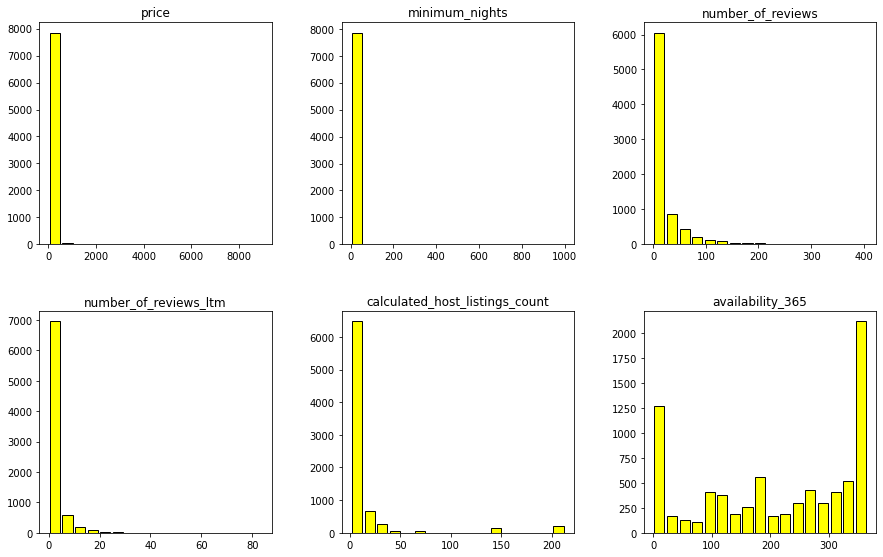

In [6]:
# plotar o histograma das variáveis numéricas
list_hist = ['price','minimum_nights','number_of_reviews','number_of_reviews_ltm','calculated_host_listings_count','availability_365']
df.hist(list_hist, bins=17, figsize=(15,20),color='yellow', layout=(4,3), grid=False, rwidth=0.8, edgecolor='black');

#### **Tratando _Outliers_**
Para uma aproximação de um valor mais próximo da realidade, é necessário fazer uma limpeza de outliers nesta coluna. Caso não seja feito isso, o resultado tenderá para um valor maior do que deveria ser devido ao registro de 8000 euros por exemplo.



---



_O que são outliers?_

_São valores que se destacam por estar fora do padrão e normalmente de forma isolada. Sabendo disto, podemos filtrar esses valores para que os resultados do estudo fiquem mais próximo dos valores reais._



---




Aplicando esta ideia, foi adotado um método chamado Interquartile range (IQR Score) para delimitar o valor máximo da variável price, excluindo apenas os outliers. Este método é estatístico e foi desenvolvido com o objetivo de avaliar o grau de espalhamento dos dados. Trazendo uma solução mais robusta.

Aplicando o IQR Score, foi obtido um valor superior de 202.5. Foi aplicado também na variável minimum_nights e valor superior obtido foi 6. É importante lembrar que valores iguais à 0 não são inúteis para a variável price em tratamento, por esse motivo devem ser excluídos também.

 Antes de fazer todas a remoção dos outliers, é importante verificar o impacto no dataset dessa remoção. Sabendo disso é averiguado qual a porcentagem de dados que será deletada nesta limpeza de dados. Com isso, não é tomada nenhuma decisão sem a noção do impacto à base. No caso deste projeto, aprimadamente de 15% dos dados foram perdidos como outliers.


In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
count,7.895000e+03,7.895000e+03,7895.000000,7895.000000,7895.000000,7895.000000,7895.00000,7895.000000,7895.000000,7895.000000
mean,2.924071e+07,1.333874e+08,35.934544,14.436214,98.136289,4.435972,18.71311,1.687524,14.640025,214.252438
std,1.383762e+07,1.142926e+08,0.059120,0.096754,263.286271,23.360118,34.54913,4.050575,38.670195,133.716510
min,5.018800e+04,5.900800e+04,35.813300,14.195400,8.000000,1.000000,0.00000,0.000000,1.000000,0.000000
25%,1.889149e+07,2.609471e+07,35.899100,14.393340,40.000000,1.000000,0.00000,0.000000,1.000000,92.000000
50%,3.185078e+07,1.037066e+08,35.914910,14.485300,65.000000,2.000000,4.00000,0.000000,3.000000,243.000000
75%,4.158368e+07,2.225276e+08,35.951145,14.499605,105.000000,3.000000,21.00000,2.000000,9.000000,350.000000
max,4.949536e+07,3.989202e+08,36.080250,14.577990,9000.000000,1000.000000,406.00000,84.000000,213.000000,365.000000


IQR da variável price é: 65.0
O limite superior da variável price é:  202.5
O limite inferior da variável price é:  -57.5

IQR da variável mininum nights é: 2.0
O limite superior da variável minimum_nights é:  6.0
O limite inferior da variável minimum_nights é:  -2.0 




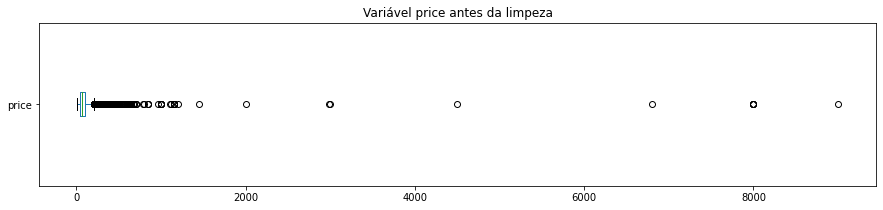

O dataset possui 7895 colunas
525 Entradas acima de 202.5
Representam 6.65% do dataset




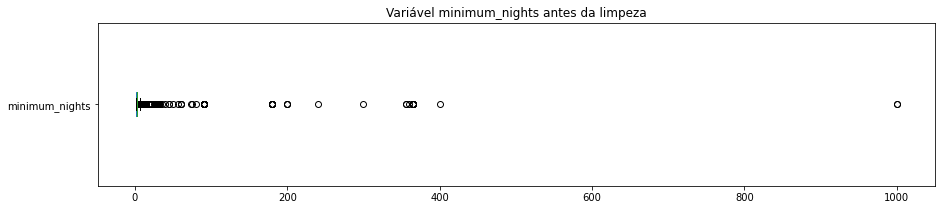

O dataset possui 7895 colunas
662 Entradas acima de 6
Representam 8.39% do dataset


In [8]:
#identificando outliers da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR da variável price é:', iqr_price)
 
#definindo os limites de corte na variável price
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price
 
print('O limite superior da variável price é: ', sup_price)
print('O limite inferior da variável price é: ', inf_price)

#identificando outliers da variável minimum_nights
q1_nights = df.minimum_nights.quantile(.25)
q3_nights = df.minimum_nights.quantile(.75)
iqr_nights = q3_nights - q1_nights
print('\nIQR da variável mininum nights é:', iqr_nights)
 
#definindo os limites de corte na variável minimum_nights
sup_nights = q3_nights + 1.5 * iqr_nights
inf_nights = q1_nights - 1.5 * iqr_nights

print('O limite superior da variável minimum_nights é: ', sup_nights)
print('O limite inferior da variável minimum_nights é: ', inf_nights,'\n\n')

#verificando qual a porcentagem de dados a ser excluída para a variável price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('Variável price antes da limpeza')
plt.show()
print('O dataset possui {} colunas'.format(df.shape[0]))
print('{} Entradas acima de 202.5'.format(len(df[df.price > 202.5])))
print('Representam {:.2f}% do dataset\n\n'.format((len(df[df.price > 202.5]) / df.shape[0])*100))

#verificando qual a porcentagem de dados a ser excluída para a variável minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title('Variável minimum_nights antes da limpeza')
plt.show()
print('O dataset possui {} colunas'.format(df.shape[0]))
print('{} Entradas acima de 6'.format(len(df[df.minimum_nights > 6])))
print('Representam {:.2f}% do dataset'.format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Shape antes da limpeza:  (7895, 14)
Shape após a limpeza:  (6771, 14)


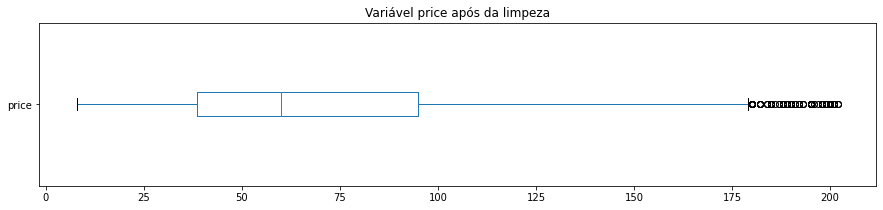

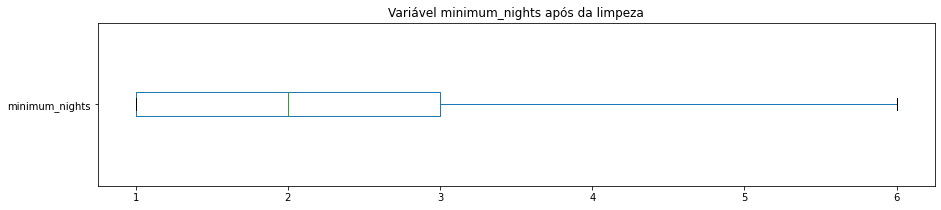

In [9]:
#limpando o dataset
df_cleaned = df.copy()

df_cleaned.drop(df_cleaned[df_cleaned.price > 202.5].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.price == 0.0].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_cleaned.shape)

#verificando variável price após exclusão
fig, ax = plt.subplots(figsize=(15,3))
df_cleaned.price.plot(kind='box', vert=False)
ax.set_title('Variável price após da limpeza')
plt.show()

#verificando variável minimum_nights após exclusão
fig, ax = plt.subplots(figsize=(15,3))
df_cleaned.minimum_nights.plot(kind='box', vert=False)
ax.set_title('Variável minimum_nights após da limpeza')
plt.show()

### **Q4. Qual a média dos preços de aluguel?**
Após fazer os procedimentos anteriores, é simples responder essa pergunta segundo os dados obtidos. A partir do dataset o preço médio do aluguel é de 71 euros. É importante lembrar que o valor médio do aluguel no Airbnb o que normalmente fica abaixo ao serviço de hotéis.

Um dado interessante sobre Malta é que o país é muito procurado por estudantes que desejam fazer intercambio e querem estudar o inglês. O motivo dessa procura é que os valores de investimento para uma viagem desse porte são mais baixo comparados com outros países da Europa. Dessa forma, Malta se torna um destino atrativo no continente europeu.





In [10]:
print('A média do preço de aluguel no AirBnb em Malta é de {:.3} euros' .format(df_cleaned.price.mean()))

A média do preço de aluguel no AirBnb em Malta é de 71.0 euros


### **Q5. Qual a correlação existente entre as variáveis**
Através da correlação pode-se verificar a intensidade da relação, que varia entre 1(correlação positiva), 0(correlação nula) e -1(correlação negativa), que existe entre um conjunto de variáveis do DataFrame. É importante lembrar que correlação não implica casualidade, ou seja, se duas variáveis têm alguma correção, não significa que o aumento de uma vai reforçar a outra. Olhando para os dados em análise, nota-se que não existe nenhuma correlação significativa entre as variáveis apresentadas.

In [11]:
# criar uma matriz de correlação
matriz_cor = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação

display(matriz_cor)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.105848,-0.103627,0.171090,0.099314
minimum_nights,0.105848,1.000000,0.036145,-0.086197,-0.029823
number_of_reviews,-0.103627,0.036145,1.000000,-0.124215,0.009011
calculated_host_listings_count,0.171090,-0.086197,-0.124215,1.000000,0.163262
availability_365,0.099314,-0.029823,0.009011,0.163262,1.000000


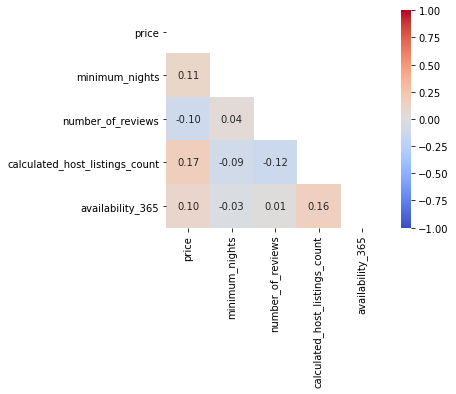

In [12]:
# plotar um heatmap a partir das correlações
mask = np.triu(matriz_cor)
sns.heatmap(matriz_cor, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', vmin=-1, vmax=1, annot=True, mask=mask);

<center><img alt="Analisando Airbnb" width="100%" src=https://www.belta.org.br/wp-content/uploads/St_Georges_Bay_Aerial_View_2baixaa-810x430.jpg"></center>

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Segundo os dados de número de avaliações, 56% dos imóveis para aluguel cadastrados na plataforma do Airbnb em Malta são no modelo de Entire home/apt, ou seja, o aluguel é de todo imóvel seja apartamento ou casa. Olhando para a parte de avaliações também confirma que é o modelo que mais tem avaliação.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_cleaned.room_type.value_counts())
print('\n\n\nDe acordo com número de avaliações, o tipo de imóvel mais alugado é o modelo do imóvel completo.\n',df_cleaned.groupby(['room_type']).number_of_reviews.mean().sort_values(ascending=False)[:10])

Entire home/apt    3850
Private room       2463
Shared room         305
Hotel room          153
Name: room_type, dtype: int64



De acordo com número de avaliações, o tipo de imóvel mais alugado é o modelo do imóvel completo.
 room_type
Entire home/apt    25.942338
Private room       14.295981
Hotel room          5.816993
Shared room         4.691803
Name: number_of_reviews, dtype: float64


In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts() / df_cleaned.shape[0]

Entire home/apt    0.568601
Private room       0.363757
Shared room        0.045045
Hotel room         0.022596
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Extraindo a informação que os dados nos proporcionam, o ranking dos bairros mais caros é 1º: Luqa[16 entradas], 2º: Dingli[2 entradas], 3º: Ghasri[54 entradas], 4º: Gharb[73 entradas], 5º: Sannat[34 entradas], 6º: San Lawrenz[36 entradas], 7º: Xaghra[177 entradas], 8º: Kercem[42 entradas], 9º: Kalkara[20 entradas] e 10º: Valletta[416 entradas].

Olhando os dados disponíveis, nota-se que a média de preço é influenciada pela falta de dados. Por exemplo: A cidade de Valletta é a capital de Malta, normalmente a capital tem um preço acima das demais cidades, mas não é o que acontece nesse dataset que está em análise. Por conta da maior quantidade de dados, Valletta aparece na décima posição.




In [15]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Luqa           146.687500
Dingli         132.500000
Ghasri         120.333333
Gharb          107.150685
Sannat         106.764706
San Lawrenz    103.361111
Xaghra         100.587571
Kercem          95.119048
Kalkara         94.700000
Valletta        89.314904
Name: price, dtype: float64

In [16]:
print('Quantidade de entradas para Luqa =',df_cleaned[df_cleaned.neighbourhood == "Luqa"].shape[0])
print('Quantidade de entradas para Dingli =',df_cleaned[df_cleaned.neighbourhood == 'Dingli'].shape[0])
print('Quantidade de entradas para Ghasri =',df_cleaned[df_cleaned.neighbourhood == 'Ghasri'].shape[0])
print('Quantidade de entradas para Gharb =',df_cleaned[df_cleaned.neighbourhood == 'Gharb'].shape[0])
print('Quantidade de entradas para Sannat =',df_cleaned[df_cleaned.neighbourhood == 'Sannat'].shape[0])
print('Quantidade de entradas para San Lawrenz =',df_cleaned[df_cleaned.neighbourhood == 'San Lawrenz'].shape[0])
print('Quantidade de entradas para Xaghra =',df_cleaned[df_cleaned.neighbourhood == 'Xaghra'].shape[0])
print('Quantidade de entradas para Kercem =',df_cleaned[df_cleaned.neighbourhood == 'Kercem'].shape[0])
print('Quantidade de entradas para Kalkara =',df_cleaned[df_cleaned.neighbourhood == 'Kalkara'].shape[0])
print('Quantidade de entradas para Valletta =',df_cleaned[df_cleaned.neighbourhood == 'Valletta'].shape[0])

Quantidade de entradas para Luqa = 16
Quantidade de entradas para Dingli = 2
Quantidade de entradas para Ghasri = 54
Quantidade de entradas para Gharb = 73
Quantidade de entradas para Sannat = 34
Quantidade de entradas para San Lawrenz = 36
Quantidade de entradas para Xaghra = 177
Quantidade de entradas para Kercem = 42
Quantidade de entradas para Kalkara = 20
Quantidade de entradas para Valletta = 416


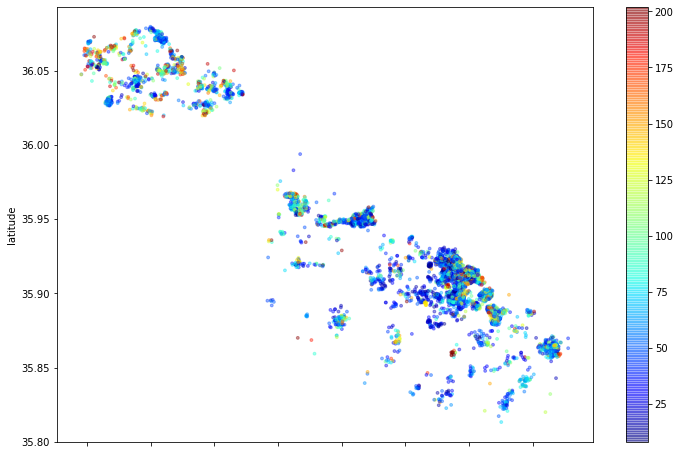

In [17]:
# plotar os imóveis pela latitude-longitude
df_cleaned.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_cleaned['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média de noites mínimas para aluguel de imóvel na ilha de Malta é 2 noites. Uma hipótese pode ser que os proprietários de imóveis se baseiam em aluguéis por finais de semanas completos. Com essa condição, há um aumento no lucro e diminuição no gasto com arrumações após o uso.

In [ ]:
# ver a média da coluna `minimum_nights`
print('A média de mínimo de noites para aluguel de imóveis em Malta é {:0.3} noites.' .format(df_cleaned.minimum_nights.mean()))


A média de mínimo de noites para aluguel de imóveis em Malta é 2.35 noites.


## Conclusões

Finalizando a análise exploratória, pode-se notar que é possível coletar informações de grande valia para quem pretende viajar para Ilha de Malta, mesmo que usando um dataset resumido, principalmente para quem deseja visitar a ilha sem ter surpresas financeiras na parte de hospedagem. 
É importante ressaltar que para ter uma melhor precisão e análise mais apurada é necessário utilizar um dataset com mais variáveis. Gerando mais informações e respondendo mais perguntas com mais dados.



